In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit

In [2]:
%matplotlib inline

In [3]:
os.getcwd()

'C:\\Users\\1672040\\Desktop\\project\\back_order_prediction'

In [2]:
RAW_TRAIN_DF = pd.read_csv('data/Kaggle_Test_Dataset_v2.csv')

c:\users\1672040\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [8]:
RAW_TRAIN_DF.isnull().sum()

sku                      0
national_inv             1
lead_time            14725
in_transit_qty           1
forecast_3_month         1
forecast_6_month         1
forecast_9_month         1
sales_1_month            1
sales_3_month            1
sales_6_month            1
sales_9_month            1
min_bank                 1
potential_issue          1
pieces_past_due          1
perf_6_month_avg         1
perf_12_month_avg        1
local_bo_qty             1
deck_risk                1
oe_constraint            1
ppap_risk                1
stop_auto_buy            1
rev_stop                 1
went_on_backorder        1
dtype: int64

In [6]:
'Inauguration of Nissan ODC'.upper()

'INAUGURATION OF NISSAN ODC'

In [5]:
RAW_TRAIN_DF.describe()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,1.687860e+06,1.586967e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06
mean,4.961118e+02,7.872267e+00,4.405202e+01,1.781193e+02,3.449867e+02,5.063644e+02,5.592607e+01,1.750259e+02,3.417288e+02,5.252697e+02,5.277230e+01,2.043724e+00,-6.872059e+00,-6.437947e+00,6.264507e-01
std,2.961523e+04,7.056024e+00,1.342742e+03,5.026553e+03,9.795152e+03,1.437892e+04,1.928196e+03,5.192378e+03,9.613167e+03,1.483861e+04,1.254983e+03,2.360165e+02,2.655636e+01,2.584333e+01,3.372224e+01
min,-2.725600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.900000e+01,-9.900000e+01,0.000000e+00
25%,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.300000e-01,6.600000e-01,0.000000e+00
50%,1.500000e+01,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,8.200000e-01,8.100000e-01,0.000000e+00
75%,8.000000e+01,9.000000e+00,0.000000e+00,4.000000e+00,1.200000e+01,2.000000e+01,4.000000e+00,1.500000e+01,3.100000e+01,4.700000e+01,3.000000e+00,0.000000e+00,9.700000e-01,9.500000e-01,0.000000e+00
max,1.233440e+07,5.200000e+01,4.894080e+05,1.427612e+06,2.461360e+06,3.777304e+06,7.417740e+05,1.105478e+06,2.146625e+06,3.205172e+06,3.133190e+05,1.464960e+05,1.000000e+00,1.000000e+00,1.253000e+04


## Features
* `Sku(Stock Keeping unit) :` The product id — Unique for each row so can be ignored
* `National_inv :` The present inventory level of the product
* `Lead_time :` Transit time of the product
* `In_transit_qty :` The amount of product in transit
* `Forecast_3_month ,Forecast_6_month,Forecast_9_month :` Forecast of the sales of the product for coming 3 , 6 and 9 months respectively
* `Sales_1_month , sales_3_month ,sales_6_month , sales_9_month :` Actual sales of the product in last 1 , 3 ,6 and 9 months respectively
* `Min_bank :` Minimum amount of stock recommended
* `Potential_issue :` Any problem identified in the product/part
* `Pieces_past_due:` Amount of parts of the product overdue if any
* `Perf_6_month_avg , perf_12_month_avg :` Product performance over past 6 and 12 months respectively
* `Local_bo_qty :` Amount of stock overdue
* `Deck_risk , oe_constraint, ppap_risk, stop_auto_buy, rev_stop :` Different Flags (Yes or No) set for the product
* `Went_on_backorder :` Target variable

In [6]:
round(RAW_TRAIN_DF.isnull().sum()/len(RAW_TRAIN_DF),2)*100

sku                  0.0
national_inv         0.0
lead_time            6.0
in_transit_qty       0.0
forecast_3_month     0.0
forecast_6_month     0.0
forecast_9_month     0.0
sales_1_month        0.0
sales_3_month        0.0
sales_6_month        0.0
sales_9_month        0.0
min_bank             0.0
potential_issue      0.0
pieces_past_due      0.0
perf_6_month_avg     0.0
perf_12_month_avg    0.0
local_bo_qty         0.0
deck_risk            0.0
oe_constraint        0.0
ppap_risk            0.0
stop_auto_buy        0.0
rev_stop             0.0
went_on_backorder    0.0
dtype: float64

In [7]:
RAW_TRAIN_DF.select_dtypes(include='object')

,sku,potential_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,No,No,No,No,Yes,No,No
1,1043384,No,No,No,No,Yes,No,No
2,1043696,No,Yes,No,No,Yes,No,No
3,1043852,No,No,No,No,Yes,No,No
4,1044048,No,Yes,No,No,Yes,No,No
...,...,...,...,...,...,...,...,...
1687856,1373987,No,No,No,No,Yes,No,No
1687857,1524346,No,Yes,No,No,No,No,Yes
1687858,1439563,No,No,No,No,Yes,No,No
1687859,1502009,No,No,No,No,Yes,No,No


In [8]:
len(RAW_TRAIN_DF['sku'].unique())

1687861

### Droping sku since it has all unique value and also Row number `1687860` as it contains all nan

In [15]:
RAW_TRAIN_DF.drop(columns=['sku'],inplace=True)
RAW_TRAIN_DF.drop(index=1687860,inplace=True)

In [14]:
for i in RAW_TRAIN_DF.select_dtypes(include='object').columns:
    RAW_TRAIN_DF[i]=RAW_TRAIN_DF[i].map({'Yes':1,'No':0})

In [11]:
RAW_TRAIN_DF.select_dtypes(include='object').describe()

,potential_issue,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
count,1687860,1687860,1687860,1687860,1687860,1687860,1687860
unique,2,2,2,2,2,2,2
top,No,No,No,No,Yes,No,No
freq,1686953,1300377,1687615,1484026,1626774,1687129,1676567


In [13]:
RAW_TRAIN_DF.select_dtypes(include=np.number)

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,0,0,0,1,0,0
1,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,0,0,0,1,0,0
2,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,1,0,0,1,0,0
3,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,0,0,0,1,0,0
4,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,-99.00,-99.00,0.0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687855,0.0,2.0,0.0,10.0,10.0,10.0,0.0,5.0,7.0,7.0,...,0.0,0.69,0.69,5.0,1,0,0,1,0,0
1687856,-1.0,NaN,0.0,5.0,7.0,9.0,1.0,3.0,3.0,8.0,...,0.0,-99.00,-99.00,1.0,0,0,0,1,0,0
1687857,-1.0,9.0,0.0,7.0,9.0,11.0,0.0,8.0,11.0,12.0,...,0.0,0.86,0.84,1.0,1,0,0,0,0,1
1687858,62.0,9.0,16.0,39.0,87.0,126.0,35.0,63.0,153.0,205.0,...,0.0,0.86,0.84,6.0,0,0,0,1,0,0


In [21]:
CATEGORICAL_COLUMNS = [i for i in RAW_TRAIN_DF.columns if len(RAW_TRAIN_DF[i].unique())<20]

In [22]:
NUMERICAL_COLUMNS = [i for i in RAW_TRAIN_DF.columns if i not in CATEGORICAL_COLUMNS]

In [16]:
RAW_TRAIN_DF['lead_time'].mean(),RAW_TRAIN_DF['lead_time'].median(),RAW_TRAIN_DF['lead_time'].mode()

(7.872267035168343,
 8.0,
 0    8.0
 dtype: float64)

In [17]:
RAW_TRAIN_DF['lead_time'].corr(RAW_TRAIN_DF['went_on_backorder'])

-0.01832312243656214

<AxesSubplot:xlabel='went_on_backorder', ylabel='lead_time'>

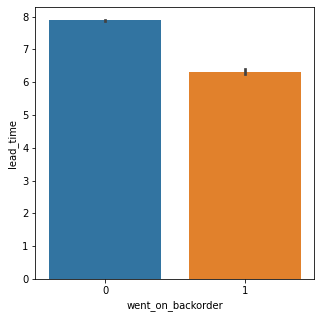

In [18]:
figure=plt.figure(figsize=(5,5))
sns.barplot(x='went_on_backorder',y='lead_time',data=RAW_TRAIN_DF)

## Detecting the MCAR pattern

In [19]:
missing_data=RAW_TRAIN_DF.copy()
missing_data['missing']=False

In [20]:
len(missing_data[missing_data.lead_time.isnull()].index)

100893

In [21]:
missing_data.loc[missing_data[missing_data.lead_time.isnull()].index,'missing']=True

* H0 : There is no association between the missingness in the lead_team column and went_onbackorder. The critical  p -value associated to this test is equal to 0.05.

In [22]:
ct=pd.crosstab(missing_data.went_on_backorder,missing_data.missing)
ct

missing,False,True
went_on_backorder,,
0,1575998,100569
1,10969,324


* The contingencey table is the following:

In [23]:
#          |   True   |   False  |

# 0       |   1000569   |   1575998   |

# 1      |   324   |   10969   |

* This table will be fed to the Chi2 contngency test from the scipy library. We expect that the degree of freedom will be 1 ((nrows-1) * (nclos-1)). This is also an information the scipy function returns.

In [24]:
table=[[ 1000569,1575998],[324,1096]]

In [25]:
from scipy.stats import chi2_contingency
chi2, p, dof, ex = chi2_contingency(table)
chi2, p, dof, ex

(152.61198778931708,
 4.6566445253553326e-35,
 1,
 array([[1.00034169e+06, 1.57622531e+06],
        [5.51309242e+02, 8.68690758e+02]]))

In [26]:
print("The p-value is equal to {}".format(round(p,3)))

The p-value is equal to 0.0


Since the  p -value is less than 5%, significant result, we will reject the null hypothesis (H0) and the two variables are depedent

In [27]:
missing_data[missing_data['missing']==True]['went_on_backorder'].value_counts()/len(missing_data[missing_data['missing']==True])

0    0.996789
1    0.003211
Name: went_on_backorder, dtype: float64

In [28]:
missing_data[missing_data['missing']==False]['went_on_backorder'].value_counts()/len(missing_data[missing_data['missing']==False])

0    0.993088
1    0.006912
Name: went_on_backorder, dtype: float64

<AxesSubplot:xlabel='went_on_backorder'>

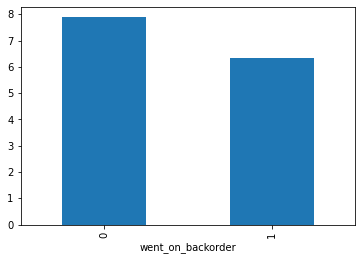

In [29]:
RAW_TRAIN_DF.groupby('went_on_backorder')['lead_time'].mean().plot.bar()

* From above we can infer that `99.67 %`missing value has lead to went_on_back _order but nothing significant because percentage remains almost same for non-missing lead_time

* so there is no significant diffence between missing and non-missing value and mean,median are also almost near to each other(normally distributed) therfore We opt to replace the missing value with mean 

### Missing value imputation


In [33]:
  - perf_6_month_avg
  - perf_12_month_avg


In [34]:

impute = SimpleImputer(strategy='median')
PROCESSED_TRAIN_DATA = impute.fit_transform(RAW_TRAIN_DF)

In [35]:
PROCESSED_TRAIN_DATA = pd.DataFrame(PROCESSED_TRAIN_DATA,columns=RAW_TRAIN_DF.columns)

In [42]:
PROCESSED_TRAIN_DATA_NORMALIZED=

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.85,0.83,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.85,0.83,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,8.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.85,0.83,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687855,0.0,2.0,0.0,10.0,10.0,10.0,0.0,5.0,7.0,7.0,...,0.0,0.69,0.69,5.0,1.0,0.0,0.0,1.0,0.0,0.0
1687856,-1.0,8.0,0.0,5.0,7.0,9.0,1.0,3.0,3.0,8.0,...,0.0,0.85,0.83,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1687857,-1.0,9.0,0.0,7.0,9.0,11.0,0.0,8.0,11.0,12.0,...,0.0,0.86,0.84,1.0,1.0,0.0,0.0,0.0,0.0,1.0
1687858,62.0,9.0,16.0,39.0,87.0,126.0,35.0,63.0,153.0,205.0,...,0.0,0.86,0.84,6.0,0.0,0.0,0.0,1.0,0.0,0.0


In [43]:
for i in CATEGORICAL_COLUMNS:
    if i!='went_on_backorder':
        temp_ct=pd.crosstab(PROCESSED_TRAIN_DATA.went_on_backorder,PROCESSED_TRAIN_DATA[i])
        chi2, p, dof, ex = stats.chi2_contingency(temp_ct)
        print("The p-value for {} and went_on_backorder is equal to {}".format(i,round(p,3)))

The p-value for potential_issue and went_on_backorder is equal to 0.0
The p-value for deck_risk and went_on_backorder is equal to 0.0
The p-value for oe_constraint and went_on_backorder is equal to 0.0
The p-value for ppap_risk and went_on_backorder is equal to 0.0
The p-value for stop_auto_buy and went_on_backorder is equal to 0.002
The p-value for rev_stop and went_on_backorder is equal to 0.046




* Apart from rev_stop all categorical variable are significantly dependent on each other based on chi square test so going with decision tree would be able to genralzied the data more preciely

### Correlation between Categorical and Numerical Features
* We will use Biserial Correlation  to measure the correlation between a Categorical Variable(Binary Category) and Continuous Variable
*  H0 : There is no correlation between the two features.

In [44]:
NUMERICAL_COLUMNS

['national_inv',
 'lead_time',
 'in_transit_qty',
 'forecast_3_month',
 'forecast_6_month',
 'forecast_9_month',
 'sales_1_month',
 'sales_3_month',
 'sales_6_month',
 'sales_9_month',
 'min_bank',
 'pieces_past_due',
 'perf_6_month_avg',
 'perf_12_month_avg',
 'local_bo_qty']

In [45]:
for i in NUMERICAL_COLUMNS:
    alpha=0.05
    corr,p_value=stats.pointbiserialr(PROCESSED_TRAIN_DATA.went_on_backorder,PROCESSED_TRAIN_DATA[i])
    
    if p_value<alpha:
        print(f"there is correlation between {i} and went_on_backorder and correlation is {round(corr,4)}")
    else:
        print(f"there is no correlation between {i} and went_on_backorder and correlation is {round(corr,4)}")

there is no correlation between national_inv and went_on_backorder and correlation is -0.0013
there is correlation between lead_time and went_on_backorder and correlation is -0.0181
there is correlation between in_transit_qty and went_on_backorder and correlation is -0.0024
there is no correlation between forecast_3_month and went_on_backorder and correlation is -0.0003
there is no correlation between forecast_6_month and went_on_backorder and correlation is -0.0008
there is no correlation between forecast_9_month and went_on_backorder and correlation is -0.001
there is no correlation between sales_1_month and went_on_backorder and correlation is -0.0011
there is correlation between sales_3_month and went_on_backorder and correlation is -0.0015
there is correlation between sales_6_month and went_on_backorder and correlation is -0.0017
there is correlation between sales_9_month and went_on_backorder and correlation is -0.0018
there is correlation between min_bank and went_on_backorder a

* As such there is no strong correlation between any of above columns because corr lies close to 0 

<AxesSubplot:>

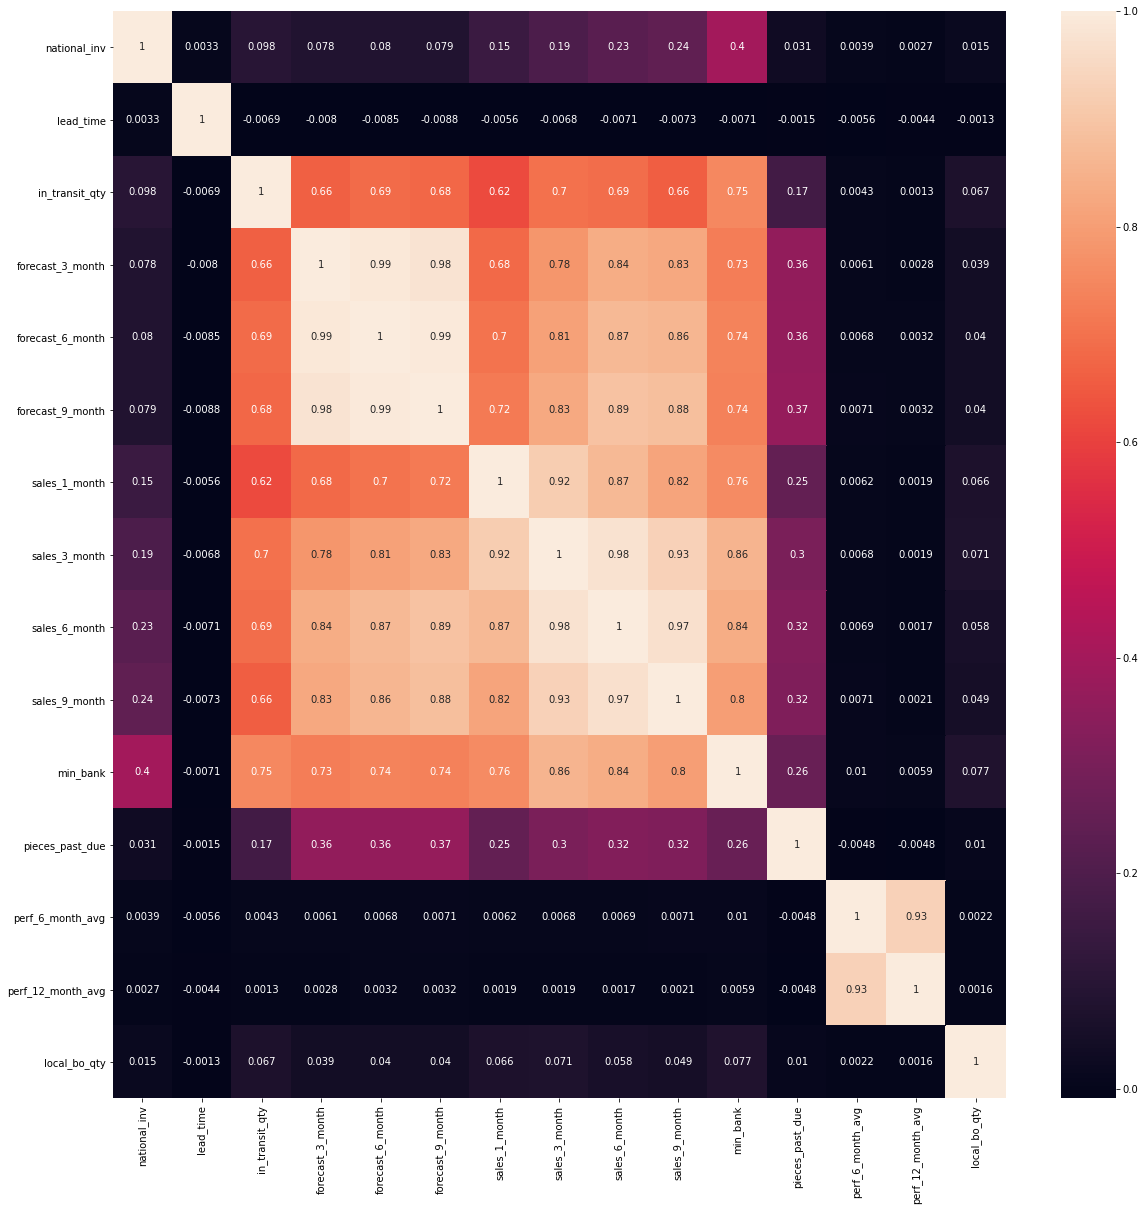

In [46]:
figure=plt.figure(figsize=(20,20))
sns.heatmap(PROCESSED_TRAIN_DATA[NUMERICAL_COLUMNS].corr(),annot=True)

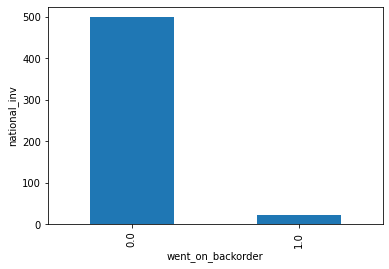

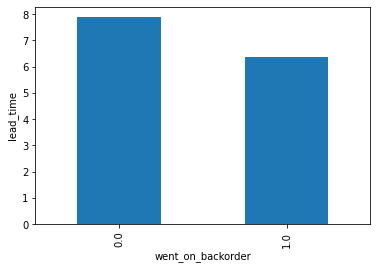

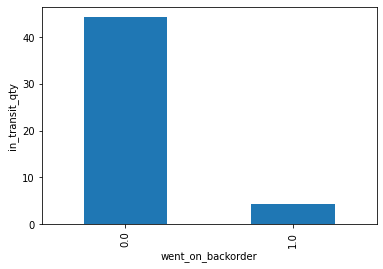

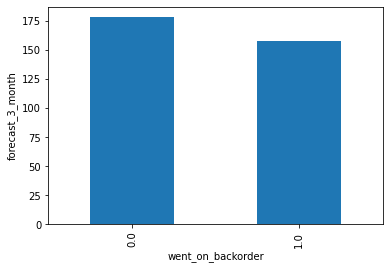

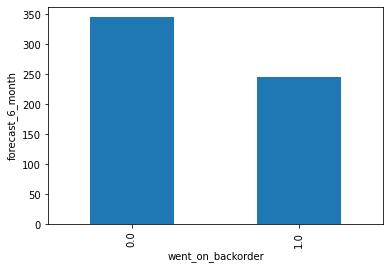

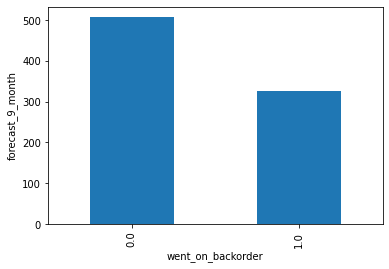

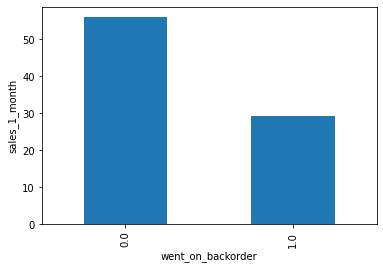

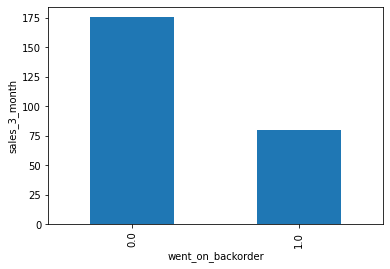

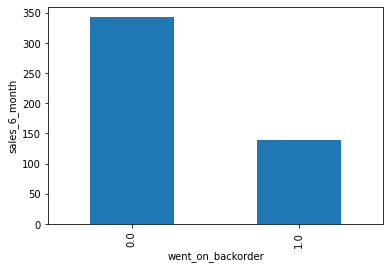

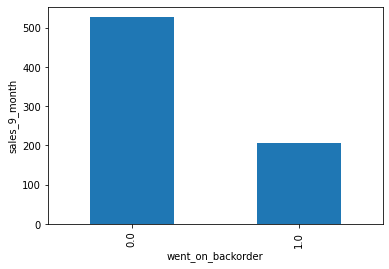

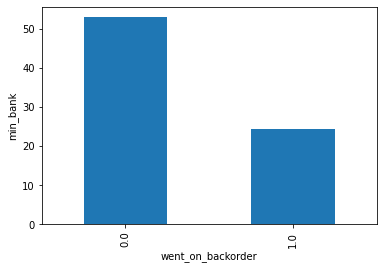

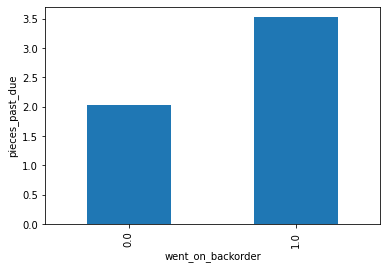

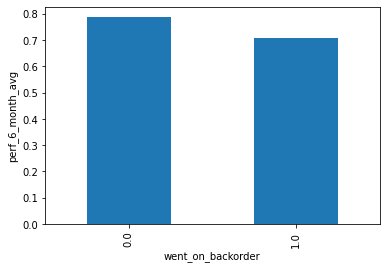

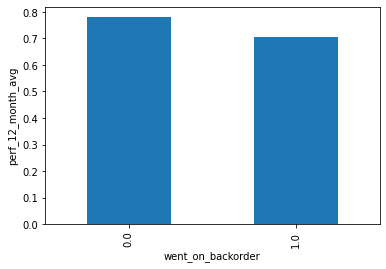

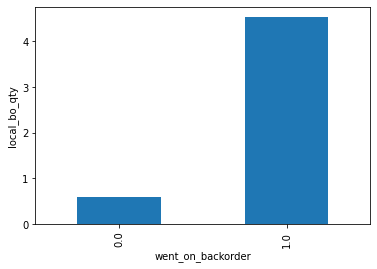

In [47]:
for i in NUMERICAL_COLUMNS:
    ax=PROCESSED_TRAIN_DATA.groupby('went_on_backorder')[i].mean().plot.bar()
    ax.set(ylabel=i)
    plt.show()

### Outlier


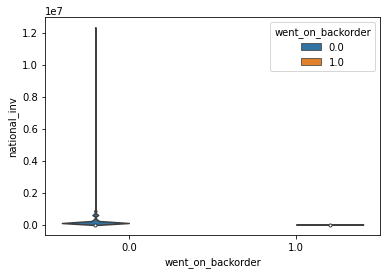

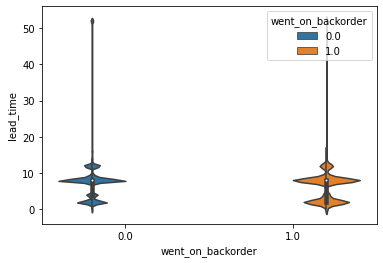

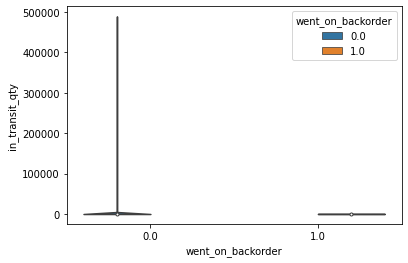

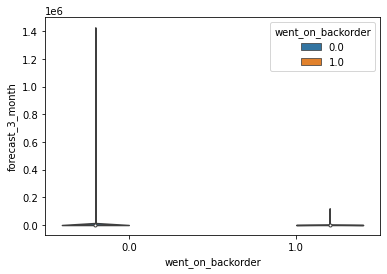

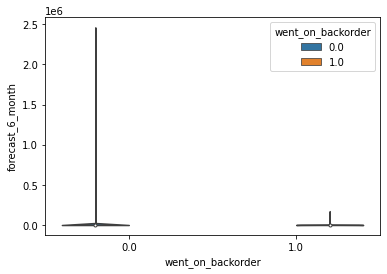

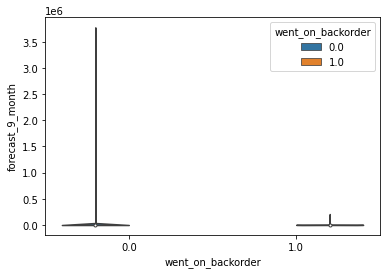

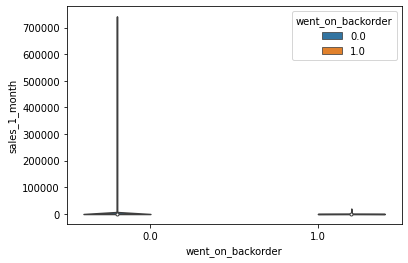

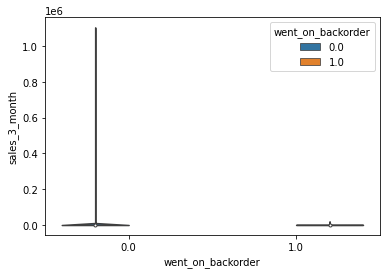

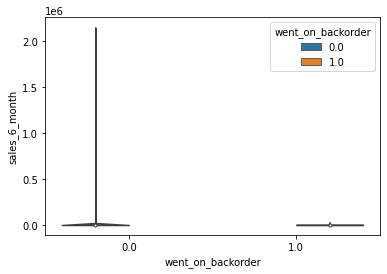

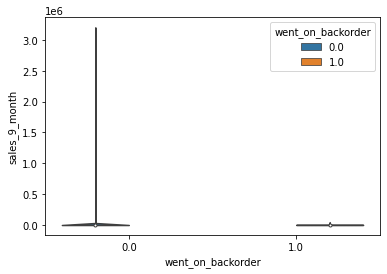

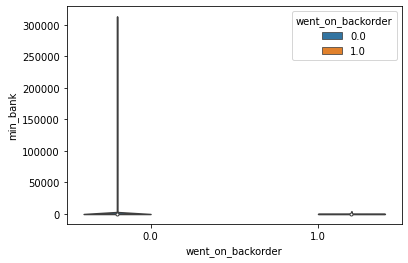

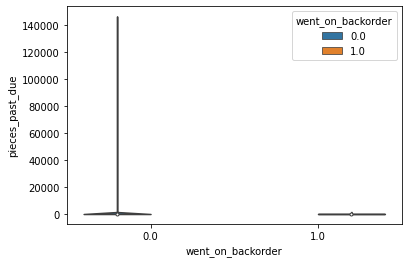

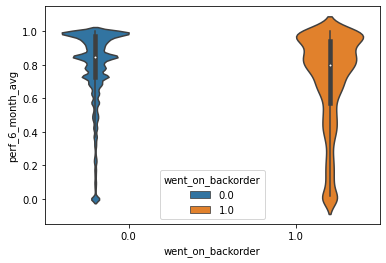

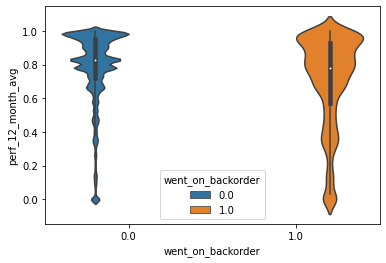

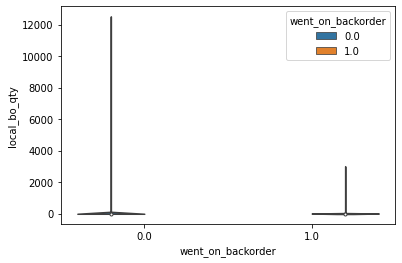

In [48]:

for i in NUMERICAL_COLUMNS:
    sns.violinplot(x = 'went_on_backorder',y = i ,hue = 'went_on_backorder', data = PROCESSED_TRAIN_DATA,size=15,notch = True)
    plt.show()

* The product which went on backorder has `pieces_past_due` and `in_trans_qty` are around zero
* Sale for 9 month is almost Zero for order went on backorder

In [51]:
outlier_df = pd.DataFrame(columns=['feature','upper_limit','lower_limit'])
up_limit = []
lw_limit = []
def outlier(df,num_column):
    for i in num_column:
        q3=df[i].quantile(0.75)
        q1=df[i].quantile(0.25)
        iqr=q3-q1
        up_limit.append(q3+1.5*iqr)
        lw_limit.append(q1-1.5*iqr)
        
    outlier_df['feature']=NUMERICAL_COLUMNS
    outlier_df['upper_limit'] = up_limit
    outlier_df['lower_limit'] = lw_limit
    
    return outlier_df

In [52]:
outlier_df = outlier(PROCESSED_TRAIN_DATA,NUMERICAL_COLUMNS)
outlier_df

,feature,upper_limit,lower_limit
0,national_inv,194.000,-110.000
1,lead_time,14.000,-2.000
2,in_transit_qty,0.000,0.000
3,forecast_3_month,10.000,-6.000
4,forecast_6_month,30.000,-18.000
5,forecast_9_month,50.000,-30.000
6,sales_1_month,10.000,-6.000
7,sales_3_month,37.500,-22.500
8,sales_6_month,77.500,-46.500
9,sales_9_month,117.500,-70.500


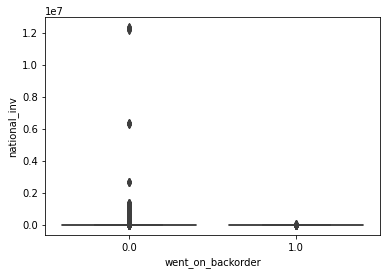

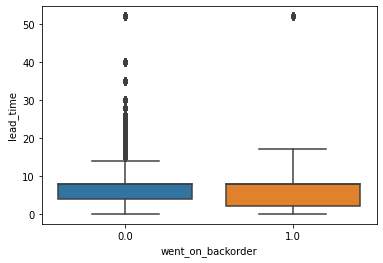

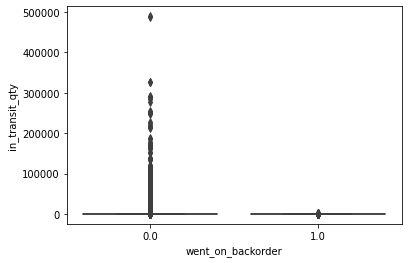

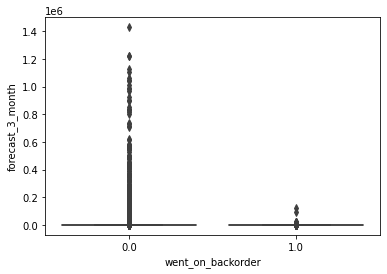

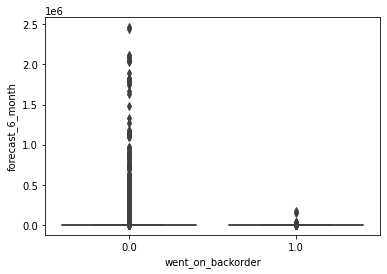

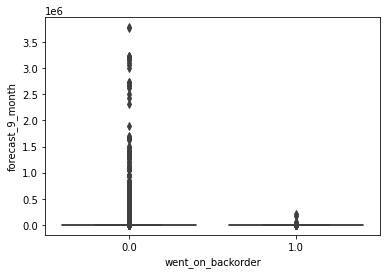

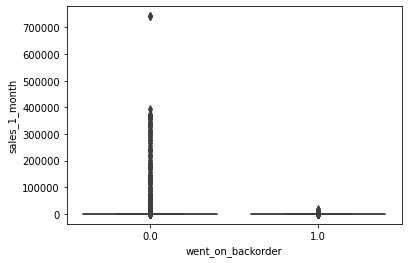

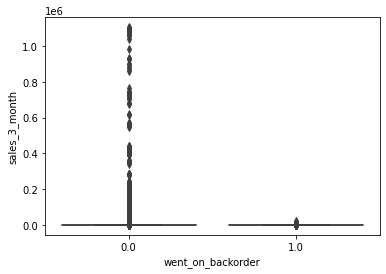

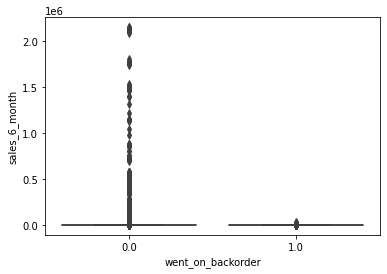

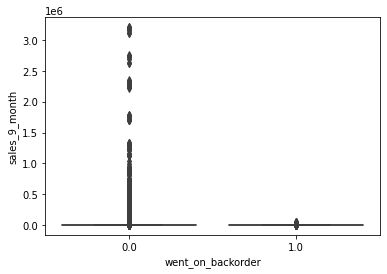

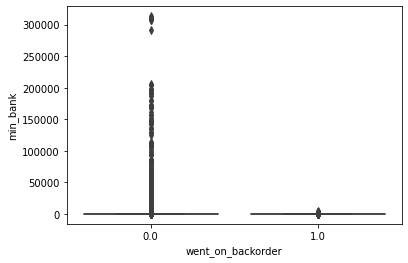

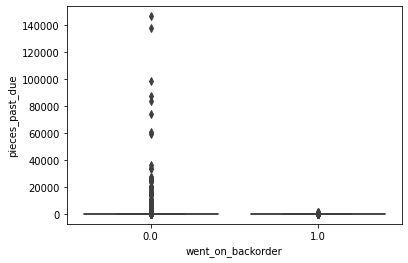

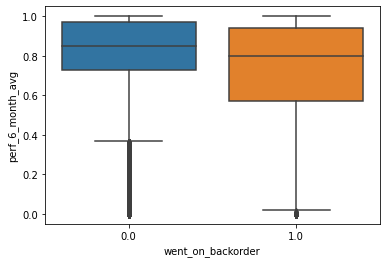

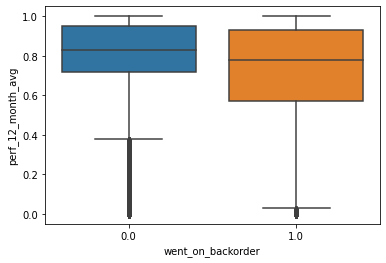

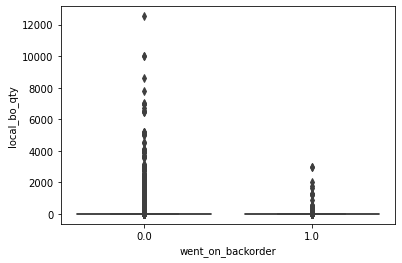

In [50]:
for i in NUMERICAL_COLUMNS:
    sns.boxplot(data=PROCESSED_TRAIN_DATA,x='went_on_backorder',y=i)
    plt.show()

In [54]:
print(RAW_TRAIN_DF[PROCESSED_TRAIN_DATA.national_inv>PROCESSED_TRAIN_DATA.national_inv.median()]['national_inv'].mean())
print(RAW_TRAIN_DF[PROCESSED_TRAIN_DATA.national_inv<PROCESSED_TRAIN_DATA.national_inv.median()]['national_inv'].mean())

1008.348822745769
4.39621128190238



* National inventry has significant outlier
* National inventry less than median(15) increases the chance of Went_on_backorder


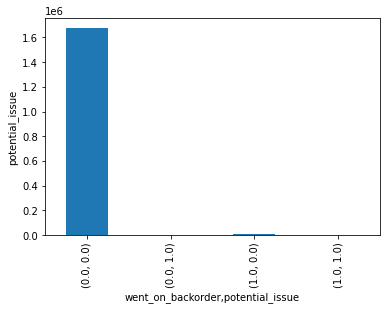

                                   potential_issue
went_on_backorder potential_issue                 
0.0               0.0                      1675711
                  1.0                          856
1.0               0.0                        11242
                  1.0                           51


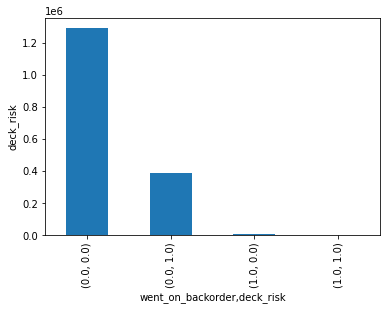

                             deck_risk
went_on_backorder deck_risk           
0.0               0.0          1291000
                  1.0           385567
1.0               0.0             9377
                  1.0             1916


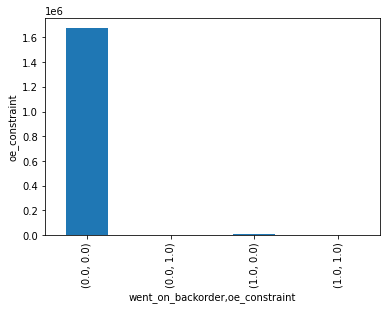

                                 oe_constraint
went_on_backorder oe_constraint               
0.0               0.0                  1676330
                  1.0                      237
1.0               0.0                    11285
                  1.0                        8


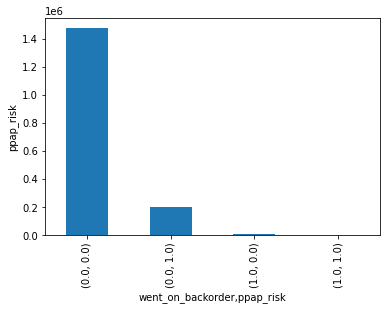

                             ppap_risk
went_on_backorder ppap_risk           
0.0               0.0          1474492
                  1.0           202075
1.0               0.0             9534
                  1.0             1759


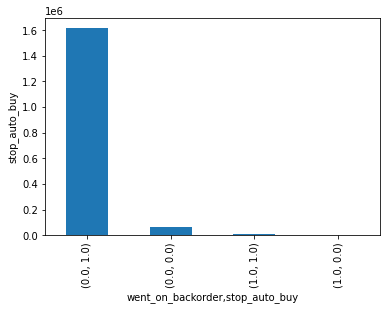

                                 stop_auto_buy
went_on_backorder stop_auto_buy               
0.0               1.0                  1615952
                  0.0                    60615
1.0               1.0                    10822
                  0.0                      471


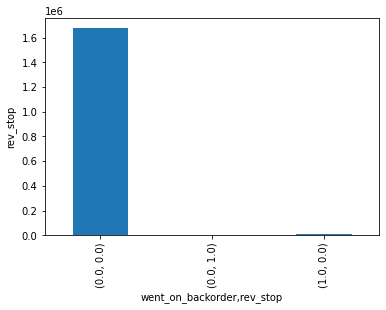

                            rev_stop
went_on_backorder rev_stop          
0.0               0.0        1675836
                  1.0            731
1.0               0.0          11293


In [55]:
for i in CATEGORICAL_COLUMNS:
    if i!='went_on_backorder':
        RAW_TRAIN_DF.groupby('went_on_backorder')[i].value_counts().plot(kind='bar',)
        plt.ylabel(i)
        plt.show()
        print(pd.DataFrame(RAW_TRAIN_DF.groupby('went_on_backorder')[i].value_counts()))
        print('='*50)

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

In [58]:
vif(PROCESSED_TRAIN_DATA[NUMERICAL_COLUMNS])

,variables,VIF
0,national_inv,1.874181
1,lead_time,2.113934
2,in_transit_qty,3.014407
3,forecast_3_month,91.736658
4,forecast_6_month,473.850855
5,forecast_9_month,267.373501
6,sales_1_month,7.629283
7,sales_3_month,61.795306
8,sales_6_month,98.113277
9,sales_9_month,20.771196


# `Conclusion`


* If rev_stop is 0 than there is 100% chance of order went on backorder
* Data is highly imbalnce so choosing the correct evaluation like precision,Recall, and F1 Score metric would be crusial.
* There are only eight instance when oe_constraint is true or yes for order went_on_backorder
* In Lead_time feature there are many Nan values. performed imputations on that feature.
* Sales and forcast are highely correlated so using logistic regression and linear SVM will not able to generalised the data
* Most of the catgorical value are dependent on each other so decision tree would be able to generalized the data more precisely
* The numerical column for sale and forcast has the outlier and they can't be assume as noise because sales of product can go high and will have positive imapct on forcast and also chance of backorder marginalise.
* We need to make sure that cardinality of training and test data is equal in train and test data to avoid overfitting in decision tree
 

## Model Selection

In [116]:
PROCESSED_TRAIN_DATA.reset_index(inplace=True)
x=PROCESSED_TRAIN_DATA.drop(columns='went_on_backorder')
y=PROCESSED_TRAIN_DATA['went_on_backorder']

In [126]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.svm import SVC
from sklearn.metrics import precision_score,recall_score,f1_score,make_scorer
from xgboost.sklearn import XGBClassifier

In [144]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=0,)
for train_index, test_index in sss.split(x, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_val = x.iloc[train_index], x.iloc[test_index]
    y_train, y_val= y.iloc[train_index], y.iloc[test_index]

TRAIN: [1314790  411419 1296471 ... 1176057 1488403 1560425] TEST: [ 360834  854803  917570 ... 1191947    2059  854998]


In [127]:
models={'GradientBoostingClassifier':GradientBoostingClassifier(),
        'xgboost':XGBClassifier(),
        'SVC':SVC()}
scalar=StandardScaler()

In [150]:
model_evel={}
def model_evalution(x_train=x_train,y_train=y_train,x_val=x_val,y_val=y_val,models=models,Stdsclr=False,NUMERICAL_COLUMNS=NUMERICAL_COLUMNS):
    if Stdsclr:
        scalar=StandardScaler()
        scaled_numfeats_train = pd.DataFrame(scaler.fit_transform(x_train[NUMERICAL_COLUMNS]), 
                                     columns=NUMERICAL_COLUMNS, index= x_train.index)
        scaled_numfeats_test = pd.DataFrame(scaler.transform(x_test[NUMERICAL_COLUMNS]), 
                                     columns=NUMERICAL_COLUMNS, index= x_test.index)
        for col in NUMERICAL_COLUMNS:
            x_train[col] = scaled_numfeats_train[col]
            x_test[col] = scaled_numfeats_test[col]
    for model_name,model in models.items():
        score={}
        model.fit(x_train,y_train)
        y_pred=model.predict(x_val)
        score["precision_score"]=precision_score(y_val,y_pred)
        score["recall_score"]=recall_score(y_val,y_pred)
        score["accuracy"]=model.score(x_val,y_val)
        score["cross_val_score"]=cross_val_score(model,x,y,cv=5,scoring='f1_macro').mean()
        model_evel[model_name]=score
    return model_evel


In [ ]:
model_evel1 = model_evalution()


c:\users\1672040\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
model_evel2 = model_evalution(Stdsclr=True)

In [ ]:
model_evel_df = pd.DataFrame(model_evel1,index=range(0,len(model_evel)))

In [145]:
x_train

,level_0,index,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,...,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop
1314790,1314790,1314790,63.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.98,0.99,0.0,0.0,0.0,0.0,1.0,0.0
411419,411419,411419,30.0,9.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,1.00,0.99,0.0,0.0,0.0,0.0,1.0,0.0
1296471,1296471,1296471,483.0,4.0,14.0,120.0,398.0,518.0,23.0,123.0,...,0.0,0.0,0.73,0.78,0.0,0.0,0.0,0.0,1.0,0.0
893198,893198,893198,15.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.94,0.79,0.0,1.0,0.0,0.0,1.0,0.0
1332269,1332269,1332269,189.0,8.0,108.0,0.0,75.0,150.0,42.0,99.0,...,0.0,0.0,0.94,0.97,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525342,525342,525342,291.0,52.0,2.0,0.0,0.0,0.0,10.0,30.0,...,0.0,0.0,0.89,0.93,0.0,1.0,0.0,0.0,0.0,0.0
1167390,1167390,1167390,15.0,9.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.95,0.89,0.0,0.0,0.0,0.0,1.0,0.0
1176057,1176057,1176057,1.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.80,0.83,0.0,0.0,0.0,0.0,1.0,0.0
1488403,1488403,1488403,324.0,12.0,39.0,159.0,294.0,429.0,70.0,166.0,...,0.0,0.0,0.73,0.79,3.0,0.0,0.0,1.0,1.0,0.0


{}